In [97]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [98]:
df = pd.read_csv('data.csv')
len(df)

7043

In [99]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [100]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU,9305-CDSKC,1452-KIOVK,6713-OKOMC,7892-POOKP,6388-TABGU,...,9767-FFLEM,0639-TSIQW,8456-QDAVC,7750-EYXWZ,2569-WGERO,6840-RESVB,2234-XADUH,4801-JZAZL,8361-LTMKD,3186-AJIEK
gender,Female,Male,Male,Male,Female,Female,Male,Female,Female,Male,...,Male,Female,Male,Female,Female,Male,Female,Female,Male,Male
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Partner,Yes,No,No,No,No,No,No,No,Yes,No,...,No,No,No,No,No,Yes,Yes,Yes,Yes,No
Dependents,No,No,No,No,No,No,Yes,No,No,Yes,...,No,No,No,No,No,Yes,Yes,Yes,No,No
tenure,1,34,2,45,2,8,22,10,28,62,...,38,67,19,12,72,24,72,11,4,66
PhoneService,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,...,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes
MultipleLines,No phone service,No,No,No phone service,No,Yes,Yes,No phone service,Yes,No,...,No,Yes,No,No phone service,No,Yes,Yes,No phone service,Yes,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic,Fiber optic,Fiber optic,DSL,Fiber optic,DSL,...,Fiber optic,Fiber optic,Fiber optic,DSL,No,DSL,Fiber optic,DSL,Fiber optic,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No,No,No,Yes,No,Yes,...,No,Yes,No,No,No internet service,Yes,No,Yes,No,Yes


In [101]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [102]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [103]:
df['TotalCharges'].isnull().sum()

11

In [104]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [105]:
df['TotalCharges'].isnull().sum()

0

In [106]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [107]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [108]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu,9305-cdskc,1452-kiovk,6713-okomc,7892-pookp,6388-tabgu,...,9767-fflem,0639-tsiqw,8456-qdavc,7750-eyxwz,2569-wgero,6840-resvb,2234-xaduh,4801-jzazl,8361-ltmkd,3186-ajiek
gender,female,male,male,male,female,female,male,female,female,male,...,male,female,male,female,female,male,female,female,male,male
seniorcitizen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
partner,yes,no,no,no,no,no,no,no,yes,no,...,no,no,no,no,no,yes,yes,yes,yes,no
dependents,no,no,no,no,no,no,yes,no,no,yes,...,no,no,no,no,no,yes,yes,yes,no,no
tenure,1,34,2,45,2,8,22,10,28,62,...,38,67,19,12,72,24,72,11,4,66
phoneservice,no,yes,yes,no,yes,yes,yes,no,yes,yes,...,yes,yes,yes,no,yes,yes,yes,no,yes,yes
multiplelines,no_phone_service,no,no,no_phone_service,no,yes,yes,no_phone_service,yes,no,...,no,yes,no,no_phone_service,no,yes,yes,no_phone_service,yes,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic,fiber_optic,fiber_optic,dsl,fiber_optic,dsl,...,fiber_optic,fiber_optic,fiber_optic,dsl,no,dsl,fiber_optic,dsl,fiber_optic,fiber_optic
onlinesecurity,no,yes,yes,yes,no,no,no,yes,no,yes,...,no,yes,no,no,no_internet_service,yes,no,yes,no,yes


In [109]:
df.churn = (df.churn == 'yes').astype(int)

In [110]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu,9305-cdskc,1452-kiovk,6713-okomc,7892-pookp,6388-tabgu,...,9767-fflem,0639-tsiqw,8456-qdavc,7750-eyxwz,2569-wgero,6840-resvb,2234-xaduh,4801-jzazl,8361-ltmkd,3186-ajiek
gender,female,male,male,male,female,female,male,female,female,male,...,male,female,male,female,female,male,female,female,male,male
seniorcitizen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
partner,yes,no,no,no,no,no,no,no,yes,no,...,no,no,no,no,no,yes,yes,yes,yes,no
dependents,no,no,no,no,no,no,yes,no,no,yes,...,no,no,no,no,no,yes,yes,yes,no,no
tenure,1,34,2,45,2,8,22,10,28,62,...,38,67,19,12,72,24,72,11,4,66
phoneservice,no,yes,yes,no,yes,yes,yes,no,yes,yes,...,yes,yes,yes,no,yes,yes,yes,no,yes,yes
multiplelines,no_phone_service,no,no,no_phone_service,no,yes,yes,no_phone_service,yes,no,...,no,yes,no,no_phone_service,no,yes,yes,no_phone_service,yes,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic,fiber_optic,fiber_optic,dsl,fiber_optic,dsl,...,fiber_optic,fiber_optic,fiber_optic,dsl,no,dsl,fiber_optic,dsl,fiber_optic,fiber_optic
onlinesecurity,no,yes,yes,yes,no,no,no,yes,no,yes,...,no,yes,no,no,no_internet_service,yes,no,yes,no,yes


In [111]:
from sklearn.model_selection import train_test_split

df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df, test_size=0.33, random_state=1)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [164]:
df_train.shape

(4718, 21)

## EDA

In [112]:
df_train_full.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [113]:
df_train_full.churn.value_counts()

0    4113
1    1521
Name: churn, dtype: int64

In [114]:
global_mean = df_train_full.churn.mean()
round(global_mean, 3)

0.27

## Feature Importance

# Differences

In [115]:
female_mean = df_train_full[df_train_full.gender == 'female'].churn.mean()
print('gender == female:', round(female_mean, 3))

male_mean = df_train_full[df_train_full.gender == 'male'].churn.mean()
print('gender == male:  ', round(male_mean, 3))

gender == female: 0.277
gender == male:   0.263


In [116]:
global_mean - female_mean, global_mean - male_mean

(-0.006855983216553063, 0.006754520462819769)

Gender category is not important for the churn because difference is very small

In [117]:
partner_yes_mean = df_train_full[df_train_full.partner == 'yes'].churn.mean()
print('partner == yes:', round(partner_yes_mean, 3))

partner_no_mean = df_train_full[df_train_full.partner == 'no'].churn.mean()
print('partner == no:  ', round(partner_no_mean, 3))

partner == yes: 0.205
partner == no:   0.33


In [118]:
global_mean - partner_yes_mean, global_mean - partner_no_mean

(0.06493474245795922, -0.05984095297455855)

Partner variable is more importnant as differences are higher

# Risk churn

In [119]:
partner_yes_mean / global_mean

0.7594724924338315

In [120]:
partner_no_mean / global_mean

1.2216593879412643

customer's with no partner are more likely to churn

# SQL

In [121]:
df_group = df_train_full.groupby(by='gender').churn.agg(['mean', 'count'])
df_group['diff'] = df_group['mean'] - global_mean
df_group['risk'] = df_group['mean'] / global_mean
df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


In [122]:
df_train_full.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [123]:
from IPython.display import display

categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']

for col in categorical:
    df_group = df_train_full.groupby(by=col).churn.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


,mean,diff,risk
seniorcitizen,,,
0,0.242270,-0.027698,0.897403
1,0.413377,0.143409,1.531208


,mean,diff,risk
partner,,,
no,0.329809,0.059841,1.221659
yes,0.205033,-0.064935,0.759472


,mean,diff,risk
dependents,,,
no,0.313760,0.043792,1.162212
yes,0.165666,-0.104302,0.613651


,mean,diff,risk
phoneservice,,,
no,0.241316,-0.028652,0.893870
yes,0.273049,0.003081,1.011412


,mean,diff,risk
multiplelines,,,
no,0.257407,-0.012561,0.953474
no_phone_service,0.241316,-0.028652,0.893870
yes,0.290742,0.020773,1.076948


,mean,diff,risk
internetservice,,,
dsl,0.192347,-0.077621,0.712482
fiber_optic,0.425171,0.155203,1.574895
no,0.077805,-0.192163,0.288201


,mean,diff,risk
onlinesecurity,,,
no,0.420921,0.150953,1.559152
no_internet_service,0.077805,-0.192163,0.288201
yes,0.153226,-0.116742,0.567570


,mean,diff,risk
onlinebackup,,,
no,0.404323,0.134355,1.497672
no_internet_service,0.077805,-0.192163,0.288201
yes,0.217232,-0.052736,0.804660


,mean,diff,risk
deviceprotection,,,
no,0.395875,0.125907,1.466379
no_internet_service,0.077805,-0.192163,0.288201
yes,0.230412,-0.039556,0.853480


,mean,diff,risk
techsupport,,,
no,0.418914,0.148946,1.551717
no_internet_service,0.077805,-0.192163,0.288201
yes,0.159926,-0.110042,0.592390


,mean,diff,risk
streamingtv,,,
no,0.342832,0.072864,1.269897
no_internet_service,0.077805,-0.192163,0.288201
yes,0.302723,0.032755,1.121328


,mean,diff,risk
streamingmovies,,,
no,0.338906,0.068938,1.255358
no_internet_service,0.077805,-0.192163,0.288201
yes,0.307273,0.037305,1.138182


,mean,diff,risk
contract,,,
month-to-month,0.431701,0.161733,1.599082
one_year,0.120573,-0.149395,0.446621
two_year,0.028274,-0.241694,0.104730


,mean,diff,risk
paperlessbilling,,,
no,0.172071,-0.097897,0.637375
yes,0.338151,0.068183,1.252560


,mean,diff,risk
paymentmethod,,,
bank_transfer_(automatic),0.168171,-0.101797,0.622928
credit_card_(automatic),0.164339,-0.105630,0.608733
electronic_check,0.455890,0.185922,1.688682
mailed_check,0.193870,-0.076098,0.718121


People with no partners, using fiber_optic internetservice, using electronice_check paymentmethod and month-to-month contracts are more likely to churn

In [124]:
df_contract = df_train_full['contract'].value_counts()

In [125]:
df_contract

month-to-month    3104
two_year          1344
one_year          1186
Name: contract, dtype: int64

In [126]:
df_contract.index

Index(['month-to-month', 'two_year', 'one_year'], dtype='object')

In [127]:
df_contract.values

array([3104, 1344, 1186], dtype=int64)

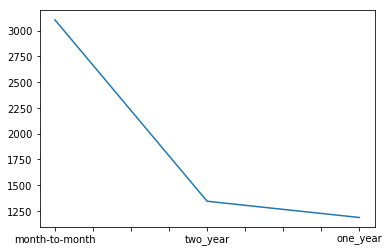

In [128]:
df_train_full['contract'].value_counts().plot()

## Feature Importance: Mutual Information

In [129]:
from sklearn.metrics import mutual_info_score
mutual_info_score(df_train_full.churn, df_train_full.contract)

0.0983203874041556

In [130]:
mutual_info_score(df_train_full.churn, df_train_full.internetservice)

0.055867945893496467

In [131]:
mutual_info_score(df_train_full.churn, df_train_full.gender)

0.0001174846211139946

In [132]:
for col in categorical:
    print(col)
    print(mutual_info_score(df_train_full.churn, df_train_full[col]))

gender
0.0001174846211139946
seniorcitizen
0.009410216144208144
partner
0.009967689095399745
dependents
0.012345815445534689
phoneservice
0.00022871269738296285
multiplelines
0.0008574478744731856
internetservice
0.055867945893496467
onlinesecurity
0.06308524972985574
onlinebackup
0.0469234640537918
deviceprotection
0.04345286925268559
techsupport
0.06103245991777444
streamingtv
0.03185333110086085
streamingmovies
0.03158089669519908
contract
0.0983203874041556
paperlessbilling
0.01758882715925275
paymentmethod
0.043210027531582915


Contract variable is the most important and gender is the least important variable

In [133]:
def mutual_info_churn_score(series):
    return mutual_info_score(df_train_full.churn, series)

In [134]:
mi = df_train_full[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending = False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

Contract variable is the most important and gender is the least important variable

## Feature Importance: Correlation

In [135]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [136]:
df_corr = df_train_full[numerical].corrwith(df_train_full.churn).to_frame('correlation')
df_corr

,correlation
tenure,-0.351885
monthlycharges,0.196805
totalcharges,-0.196353


## One hot encoding

In [137]:
from sklearn.feature_extraction import DictVectorizer

In [138]:
df_train[['gender', 'contract']].iloc[:10]

,gender,contract
6148,female,two_year
16,female,one_year
3882,male,month-to-month
6656,male,two_year
5333,female,month-to-month
2237,male,one_year
6981,female,month-to-month
1061,female,two_year
2067,male,one_year
6757,male,one_year


In [139]:
df_train_full.reset_index(inplace = True)
df_train.reset_index(inplace = True)
df_val.reset_index(inplace = True)
df_test.reset_index(inplace = True)

In [149]:
dicts = df_train[['gender', 'contract']].iloc[:100].to_dict(orient='records')

In [150]:
dv = DictVectorizer(sparse = False)
dv.fit(dicts)

DictVectorizer(sparse=False)

In [153]:
dv.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'gender=female',
 'gender=male']

In [151]:
dv.transform(dicts)

array([[0., 0., 1., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0.

In [154]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [156]:
dv = DictVectorizer(sparse = False)
dv.fit(train_dicts)
dv.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [157]:
dv.transform(train_dicts)

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        6.90000e+01, 4.57790e+03],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.20000e+01, 1.02295e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        4.00000e+00, 1.76200e+02],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.80000e+01, 2.97950e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.00000e+00, 1.14100e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        1.60000e+01, 1.11485e+03]])

In [158]:
X_train = dv.transform(train_dicts)

In [160]:
X_train.shape

(4718, 45)

In [161]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [162]:
X_val = dv.transform(val_dicts)

In [163]:
X_val.shape

(2325, 45)

## Logistic regression 

In [167]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [172]:
z = np.linspace(-7, 7, 51)

In [173]:
z

array([-7.0000000e+00, -6.7200000e+00, -6.4400000e+00, -6.1600000e+00,
       -5.8800000e+00, -5.6000000e+00, -5.3200000e+00, -5.0400000e+00,
       -4.7600000e+00, -4.4800000e+00, -4.2000000e+00, -3.9200000e+00,
       -3.6400000e+00, -3.3600000e+00, -3.0800000e+00, -2.8000000e+00,
       -2.5200000e+00, -2.2400000e+00, -1.9600000e+00, -1.6800000e+00,
       -1.4000000e+00, -1.1200000e+00, -8.4000000e-01, -5.6000000e-01,
       -2.8000000e-01,  8.8817842e-16,  2.8000000e-01,  5.6000000e-01,
        8.4000000e-01,  1.1200000e+00,  1.4000000e+00,  1.6800000e+00,
        1.9600000e+00,  2.2400000e+00,  2.5200000e+00,  2.8000000e+00,
        3.0800000e+00,  3.3600000e+00,  3.6400000e+00,  3.9200000e+00,
        4.2000000e+00,  4.4800000e+00,  4.7600000e+00,  5.0400000e+00,
        5.3200000e+00,  5.6000000e+00,  5.8800000e+00,  6.1600000e+00,
        6.4400000e+00,  6.7200000e+00,  7.0000000e+00])

In [174]:
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

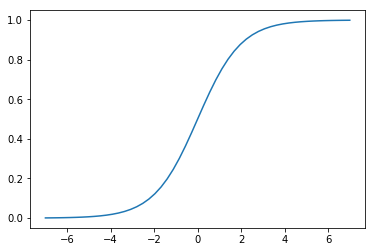

In [175]:
plt.plot(z, sigmoid(z))

## Training logistic regression

In [176]:
from sklearn.linear_model import LogisticRegression

In [177]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Rajit_Sanghvi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [178]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.05398042, 0.14112699, 0.29955646, ..., 0.33762716, 0.24719064,
       0.2547473 ])

In [179]:
churn_decision = (y_pred >= 0.5)

In [180]:
df_val[churn_decision].customerid

7       8720-rqsbj
12      6168-wfvvf
30      6402-zfppi
35      0362-zbzwj
37      4559-uwiht
           ...    
2298    3049-ndxfl
2299    1448-pwkye
2301    7503-qqrvf
2303    1031-iideo
2311    1569-ttnyj
Name: customerid, Length: 529, dtype: object

In [181]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 0, 0])

In [182]:
y_val

array([0, 0, 0, ..., 1, 0, 0])

In [186]:
churn_decision = churn_decision.astype(int)
churn_decision

array([0, 0, 0, ..., 0, 0, 0])

In [189]:
accuracy = (y_val == churn_decision).mean() * 100
accuracy

80.73118279569891

## Model Interpretation

In [211]:
model.coef_[0].round(3)

array([ 0.457, -0.163, -0.422, -0.046, -0.082,  0.051, -0.093, -0.086,
       -0.077, -0.051, -0.316,  0.281, -0.093,  0.004, -0.239,  0.076,
        0.035,  0.082, -0.093, -0.117,  0.196, -0.093, -0.231, -0.2  ,
        0.072, -0.125, -0.003, -0.106, -0.105,  0.263, -0.18 ,  0.076,
       -0.204,  0.3  , -0.122, -0.093,  0.087, -0.114, -0.093,  0.079,
        0.206, -0.093, -0.242, -0.066,  0.   ])

In [231]:
model.intercept_[0].round(3)

-0.129

In [212]:
dv.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [215]:
list(zip(dv.get_feature_names(), model.coef_[0].round(3)))

[('contract=month-to-month', 0.457),
 ('contract=one_year', -0.163),
 ('contract=two_year', -0.422),
 ('dependents=no', -0.046),
 ('dependents=yes', -0.082),
 ('deviceprotection=no', 0.051),
 ('deviceprotection=no_internet_service', -0.093),
 ('deviceprotection=yes', -0.086),
 ('gender=female', -0.077),
 ('gender=male', -0.051),
 ('internetservice=dsl', -0.316),
 ('internetservice=fiber_optic', 0.281),
 ('internetservice=no', -0.093),
 ('monthlycharges', 0.004),
 ('multiplelines=no', -0.239),
 ('multiplelines=no_phone_service', 0.076),
 ('multiplelines=yes', 0.035),
 ('onlinebackup=no', 0.082),
 ('onlinebackup=no_internet_service', -0.093),
 ('onlinebackup=yes', -0.117),
 ('onlinesecurity=no', 0.196),
 ('onlinesecurity=no_internet_service', -0.093),
 ('onlinesecurity=yes', -0.231),
 ('paperlessbilling=no', -0.2),
 ('paperlessbilling=yes', 0.072),
 ('partner=no', -0.125),
 ('partner=yes', -0.003),
 ('paymentmethod=bank_transfer_(automatic)', -0.106),
 ('paymentmethod=credit_card_(automa

In [217]:
small = ['contract', 'tenure', 'monthlycharges']

In [219]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'monthlycharges': 66.9, 'tenure': 69},
 {'contract': 'one_year', 'monthlycharges': 20.65, 'tenure': 52},
 {'contract': 'month-to-month', 'monthlycharges': 44.8, 'tenure': 4},
 {'contract': 'two_year', 'monthlycharges': 23.55, 'tenure': 48},
 {'contract': 'month-to-month', 'monthlycharges': 88.35, 'tenure': 13},
 {'contract': 'one_year', 'monthlycharges': 45.85, 'tenure': 27},
 {'contract': 'month-to-month', 'monthlycharges': 65.45, 'tenure': 8},
 {'contract': 'two_year', 'monthlycharges': 112.4, 'tenure': 72},
 {'contract': 'one_year', 'monthlycharges': 103.15, 'tenure': 65},
 {'contract': 'one_year', 'monthlycharges': 59.3, 'tenure': 51}]

In [220]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')
dicts_test_small = df_test[small].to_dict(orient='records')

In [221]:
dv_small = DictVectorizer(sparse = False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [222]:
dv_small.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'monthlycharges',
 'tenure']

In [223]:
X_train_small = dv_small.transform(dicts_train_small)
X_val_small = dv_small.transform(dicts_val_small)

In [224]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [228]:
w = model_small.coef_[0].round(3)
w

array([ 0.341, -0.633, -1.6  ,  0.029, -0.036])

In [230]:
w0 = model_small.intercept_[0]
w0

-1.9367027305857603

In [232]:
list(zip(dv_small.get_feature_names(), model_small.coef_[0].round(3)))

[('contract=month-to-month', 0.341),
 ('contract=one_year', -0.633),
 ('contract=two_year', -1.6),
 ('monthlycharges', 0.029),
 ('tenure', -0.036)]

## Testing the model

In [233]:
dicts_full_train = df_train_full[categorical + numerical].to_dict(orient='records')

In [236]:
dv = DictVectorizer(sparse = False)
dv.fit(dicts_full_train)

DictVectorizer(sparse=False)

In [237]:
dv.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [238]:
X_train_full = dv.transform(dicts_full_train)

In [239]:
y_train_full = df_train_full.churn.values

In [240]:
model = LogisticRegression()
model.fit(X_train_full, y_train_full)

LogisticRegression()

In [241]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [243]:
X_test = dv.transform(dicts_test)

In [245]:
y_predict = model.predict_proba(X_test)[:, 1]

In [246]:
churn_decision = (y_predict >= 0.5)

In [247]:
(churn_decision == y_test).mean() * 100

81.5471965933286

## Using a model to test a customer

In [248]:
customer = dicts_test[10]
customer

{'contract': 'month-to-month',
 'dependents': 'yes',
 'deviceprotection': 'no',
 'gender': 'male',
 'internetservice': 'fiber_optic',
 'monthlycharges': 93.95,
 'multiplelines': 'no',
 'onlinebackup': 'yes',
 'onlinesecurity': 'no',
 'paperlessbilling': 'yes',
 'partner': 'yes',
 'paymentmethod': 'mailed_check',
 'phoneservice': 'yes',
 'seniorcitizen': 1,
 'streamingmovies': 'yes',
 'streamingtv': 'yes',
 'techsupport': 'no',
 'tenure': 32,
 'totalcharges': 2861.45}

In [249]:
X_small = dv.transform([customer])
X_small.shape

(1, 45)

In [250]:
model.predict_proba(X_small)

array([[0.5943189, 0.4056811]])

In [251]:
model.predict(X_small)

array([0])

In [252]:
y_test[10]

0

# Customer no 10 is not likely to churn - no promotional emails to this customer please! :)

In [254]:
customer_2 = dicts_test[-1]
customer_2

{'contract': 'month-to-month',
 'dependents': 'yes',
 'deviceprotection': 'yes',
 'gender': 'female',
 'internetservice': 'fiber_optic',
 'monthlycharges': 104.2,
 'multiplelines': 'yes',
 'onlinebackup': 'no',
 'onlinesecurity': 'yes',
 'paperlessbilling': 'yes',
 'partner': 'yes',
 'paymentmethod': 'electronic_check',
 'phoneservice': 'yes',
 'seniorcitizen': 0,
 'streamingmovies': 'yes',
 'streamingtv': 'yes',
 'techsupport': 'no',
 'tenure': 17,
 'totalcharges': 1743.5}

In [255]:
X_small = dv.transform([customer_2])
X_small.shape

(1, 45)

In [256]:
model.predict_proba(X_small)

array([[0.40311479, 0.59688521]])

In [257]:
model.predict(X_small)

array([1])

In [258]:
y_test[10]

0

# Last customer in dataset is more likely to churn - send this customer some promotional emails like 20% discount, so that he/she might stay with us! :(